In [ ]:
# Importando as bibliotecas que iremos utilizar:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [ ]:
dfTeste = pd.read_csv("/content/drive/MyDrive/ProjetoCompCog/dataset/Test3classes.csv", sep=';')


In [ ]:
dfTreino = pd.read_csv("/content/drive/MyDrive/ProjetoCompCog/dataset/Train3Classes.csv", sep=";")

In [ ]:
dfTeste.head().T


,0,1,2,3,4
id,1029536486021099522,1029536496368406528,1029536531655131137,1029536560117678081,1029536605852377088
tweet_text,@Gazo1a Nossa! Muito obrigada :),@BerzGamer vai pa puta que te pariu :),QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Estávamos em casa do Zé e eu estava a morrer d...
tweet_date,Wed Aug 15 01:13:20 +0000 2018,Wed Aug 15 01:13:23 +0000 2018,Wed Aug 15 01:13:31 +0000 2018,Wed Aug 15 01:13:38 +0000 2018,Wed Aug 15 01:13:49 +0000 2018
sentiment,1,1,1,1,1
query_used,:),:),:),:),:)


In [1]:
dfTreino.head().T

NameError: ignored

In [ ]:
dfTeste['sentiment'] = dfTeste['sentiment'].replace([0,1,2],['negativo','positivo','neutro'])

0       positivo
1       positivo
2       positivo
3       positivo
4       positivo
          ...   
4994           2
4995           2
4996           2
4997           2
4998           2
Name: sentiment, Length: 4997, dtype: object

In [ ]:
# Distribuição das classes da coluna ‘sentiment’:
dfTreino.sentiment.value_counts()

1    33334
2    33333
0    33333
Name: sentiment, dtype: int64

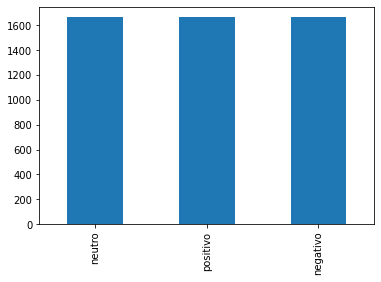

In [ ]:
# Visualizando esses dados graficamente:
dfTeste.sentiment.value_counts().plot(kind='bar')

In [ ]:
# Número de linhas da coluna ‘Text’:
dfTeste.tweet_text.count()

4997

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+') # Expressão regular para remover simbolos
cv = CountVectorizer(   analyzer='word',lowercase=True, stop_words='english',min_df=1,
                        ngram_range = (1,1), tokenizer = token.tokenize)
freq_tweets = cv.fit_transform(dfTeste['tweet_text'])

In [ ]:
print(cv.vocabulary_)

{'gazo1a': 6245, 'nossa': 9893, 'muito': 9481, 'obrigada': 10022, 'berzgamer': 2224, 'vai': 14148, 'pa': 10331, 'puta': 11383, 'que': 11536, 'te': 13325, 'pariu': 10460, 'quer': 11564, 'mais': 8713, 'descontos': 4216, '14': 92, '08': 16, 'confira': 3478, 'link': 8364, 'https': 6870, 't': 13203, 'jhh0ttlpq3': 7596, 'compartilhe': 3395, 'n': 9549, 'o': 9983, 'encontrou': 4975, 'oferta': 10072, 'ou': 10270, 'cupom': 3827, 'procurava': 11223, 'se': 12511, 'preocupe': 11110, 'criamos': 3742, 'uma': 14009, 'pagina': 10358, 'com': 3334, 'ofertas': 10073, 'e': 4746, 'cupons': 3828, 'atualizada': 1882, 'diariamente': 4370, 'igeed0wmpf': 7001, 'eu': 5330, 'vou': 14523, 'pegar': 10604, 'vcs': 14210, 'ajudem': 1184, 'galera': 6177, 'pelo': 10619, 'amor': 1371, 'butera': 2605, 'mmvas': 9277, 'iheartradiommvas': 7019, 'ffsinglenotears': 5721, 'ghzmlqrfiv': 6305, 'est': 5236, 'vamos': 14169, 'em': 4891, 'casa': 2898, 'z': 15006, 'estava': 5262, 'morrer': 9371, 'sono': 12912, 'chego': 3086, 'fico': 57

In [ ]:
##------------------------------------------------------------
## Separa os dados em treinamento e teste
##------------------------------------------------------------
y = dfTeste['sentiment']   # Carrega alvo 
X = text_counts            # Carrega as colunas geradas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [ ]:
#---------------------------------------------------------------------------
## Ajusta modelo Naive Bayes com treinamento - Aprendizado supervisionado  
#---------------------------------------------------------------------------
from sklearn.naive_bayes import MultinomialNB
NaiveB = MultinomialNB()
NaiveB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#---------------------------------------------------------------------------
## Previsão usando os dados de teste
#---------------------------------------------------------------------------
# Naive Bayes
y_pred_test_NaiveB= NaiveB.predict(X_test)

In [ ]:
#---------------------------------------------------------------------------
## Cálcula da Acurácia do Naive Bayes
#---------------------------------------------------------------------------
from sklearn import metrics
print()
print('----------------------------------------------------------')
print('Acurácia NaiveBayes:',metrics.accuracy_score(y_test, y_pred_test_NaiveB))
print('----------------------------------------------------------')


----------------------------------------------------------
Acurácia NaiveBayes: 0.786
----------------------------------------------------------


--------------------------------------------------------------------------------

CÓDIGOS NOVOS

In [ ]:
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [ ]:
# Visualizando o número de linhas e colunas da matriz:
freq_tweets.shape

(4997, 42848)

In [ ]:
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'Não quero prova!!!',
          'A segurança desse país está deixando a desejar',
          'O dia está lindo']

In [ ]:
# Transforma os dados de teste em vetores de palavras:
freq_testes = cv.transform(testes)

In [ ]:
# Probabilidades de cada classe:
print (NaiveB.classes_)
NaiveB.predict_proba(freq_testes).round(2)

['negativo' 'neutro' 'positivo']


array([[0.23, 0.  , 0.77],
       [0.25, 0.  , 0.75],
       [0.62, 0.  , 0.38],
       [0.02, 0.66, 0.32],
       [0.41, 0.03, 0.56]])

In [ ]:
# Fazendo a classificação com o modelo treinado:
for t, s in zip (testes,NaiveB.predict(freq_testes)):
    # t representa o tweet e c a classificação de cada tweet.
    print (t ,", ", s) 

Esse governo está no início, vamos ver o que vai dar ,  positivo
Estou muito feliz com o governo de Minas esse ano ,  positivo
Não quero prova!!! ,  negativo
A segurança desse país está deixando a desejar ,  neutro
O dia está lindo ,  positivo


In [ ]:
# Cross validation:
resultados = cross_val_predict(NaiveB, freq_tweets, y, cv=10)

In [ ]:
# Medindo a acurácia do modelo:
metrics.accuracy_score(y,resultados)

0.7128276966179707

In [ ]:
# Medidas de validação do modelo:
print (metrics.classification_report(y,resultados))

              precision    recall  f1-score   support

    negativo       0.59      0.78      0.67      1665
      neutro       0.86      0.98      0.91      1666
    positivo       0.71      0.38      0.50      1666

    accuracy                           0.71      4997
   macro avg       0.72      0.71      0.69      4997
weighted avg       0.72      0.71      0.69      4997



In [ ]:
# Matriz de confusão:
print (pd.crosstab(y, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   negativo  neutro  positivo   All
Real                                      
negativo      1296     123       246  1665
neutro          19    1629        18  1666
positivo       876     153       637  1666
All           2191    1905       901  4997
